<a href="https://colab.research.google.com/github/Blackerd/Demo/blob/master/ProjectML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/Lab_ML'

Mounted at /content/gdrive
/content/gdrive/MyDrive/Lab_ML


Thư viện

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

Dữ liệu


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 62 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   TextID             1000 non-null   object
 1   URL                1000 non-null   object
 2   Label              1000 non-null   object
 3   totalWordsCount    1000 non-null   int64 
 4   semanticobjscore   1000 non-null   int64 
 5   semanticsubjscore  1000 non-null   int64 
 6   CC                 1000 non-null   int64 
 7   CD                 1000 non-null   int64 
 8   DT                 1000 non-null   int64 
 9   EX                 1000 non-null   int64 
 10  FW                 1000 non-null   int64 
 11  INs                1000 non-null   int64 
 12  JJ                 1000 non-null   int64 
 13  JJR                1000 non-null   int64 
 14  JJS                1000 non-null   int64 
 15  LS                 1000 non-null   int64 
 16  MD                 1000 non-null   int64 
 

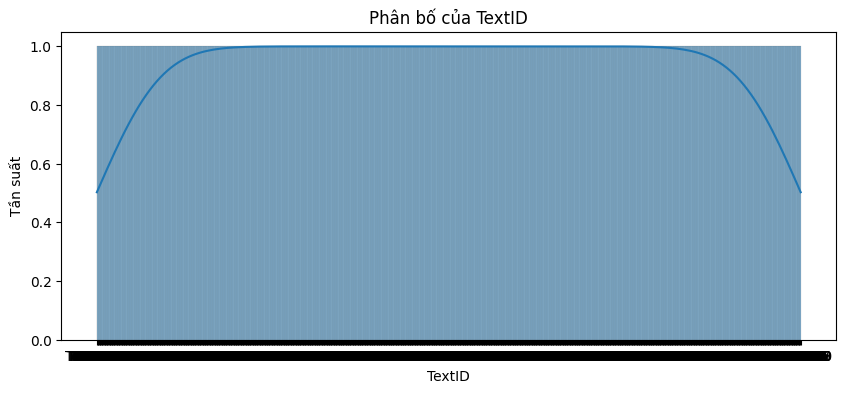

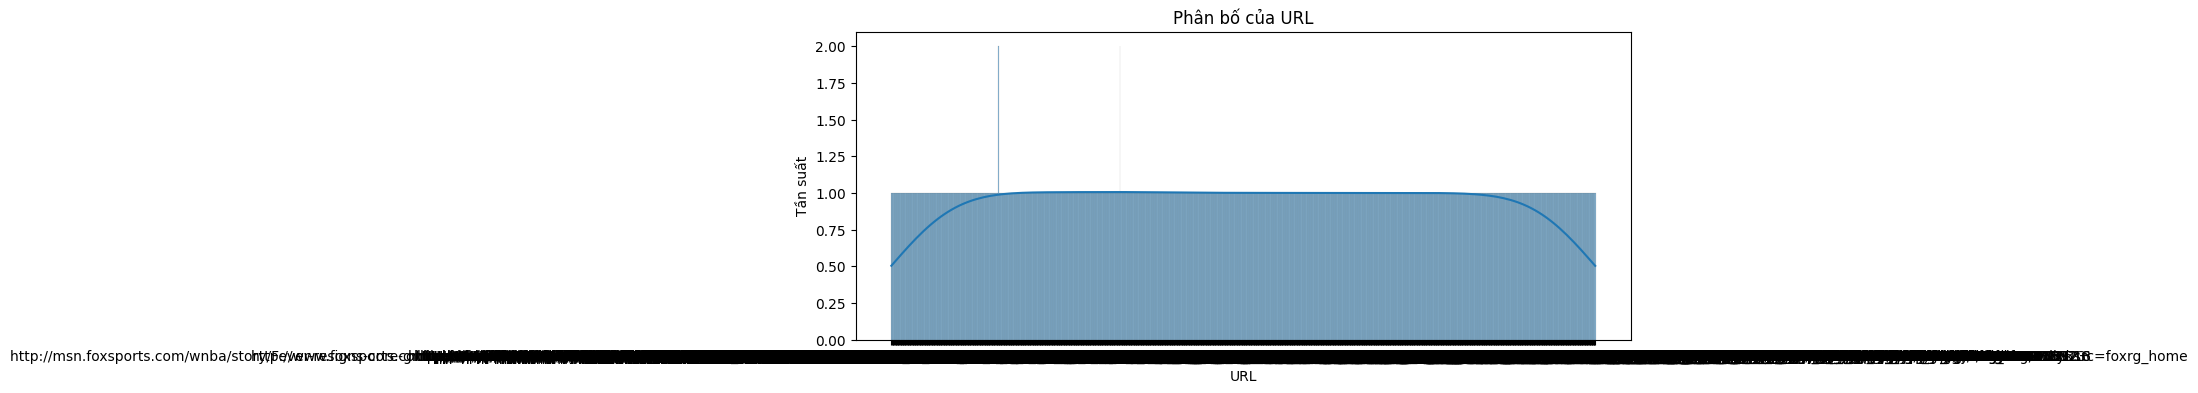

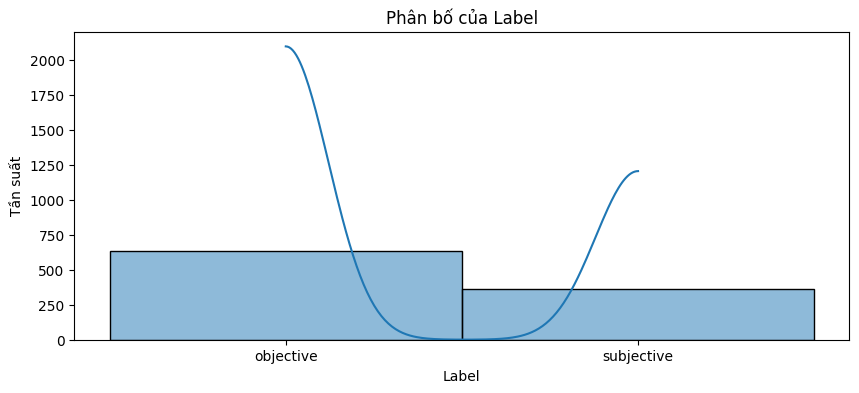

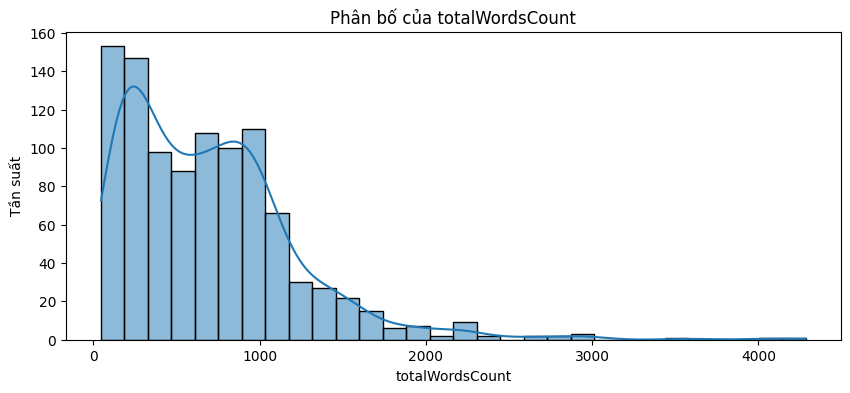

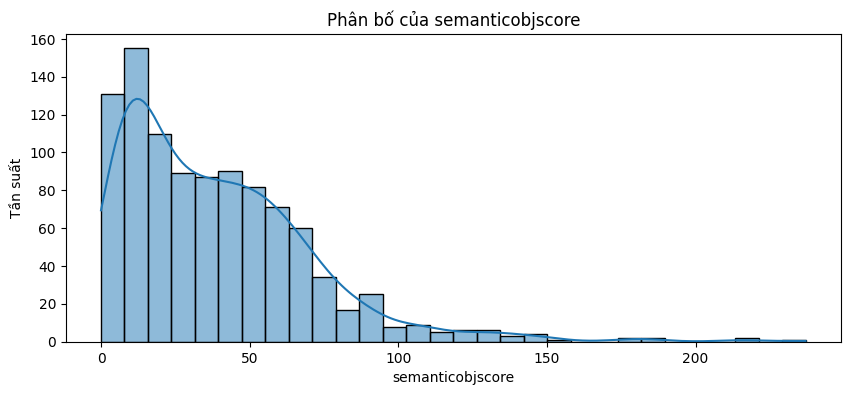

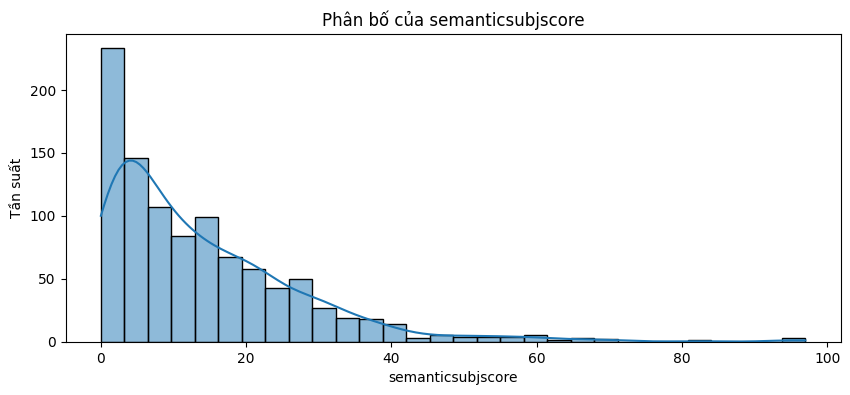

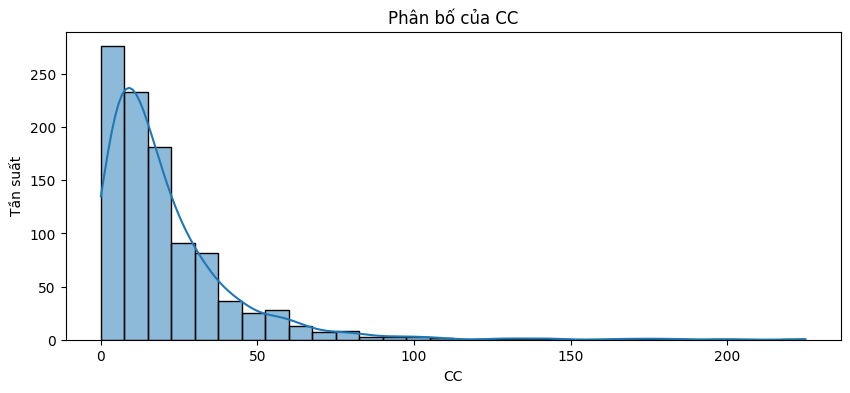

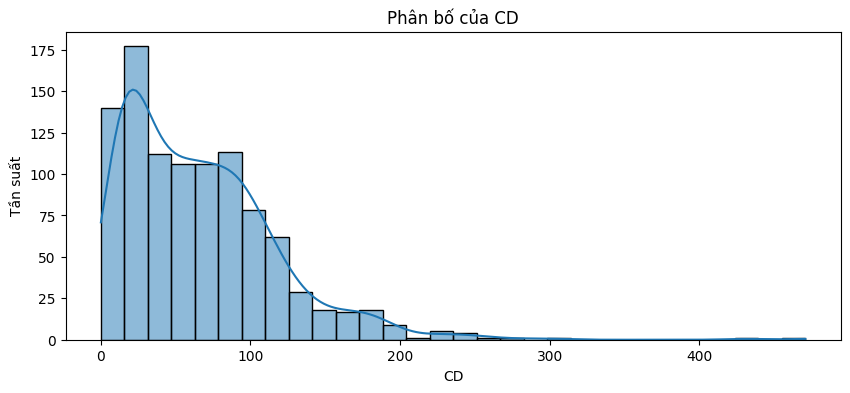

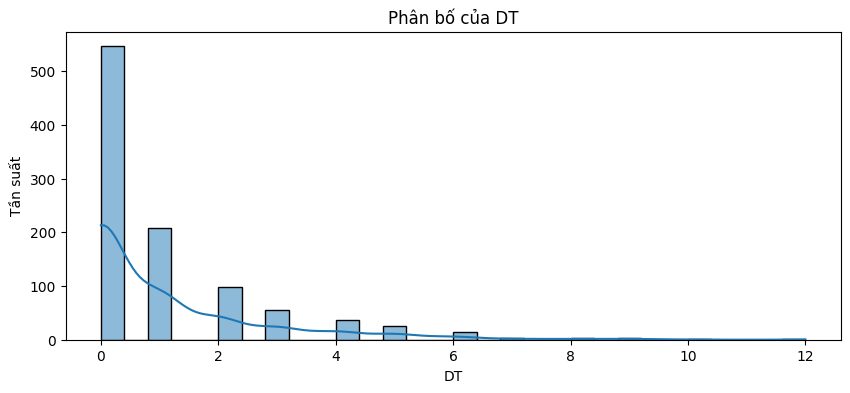

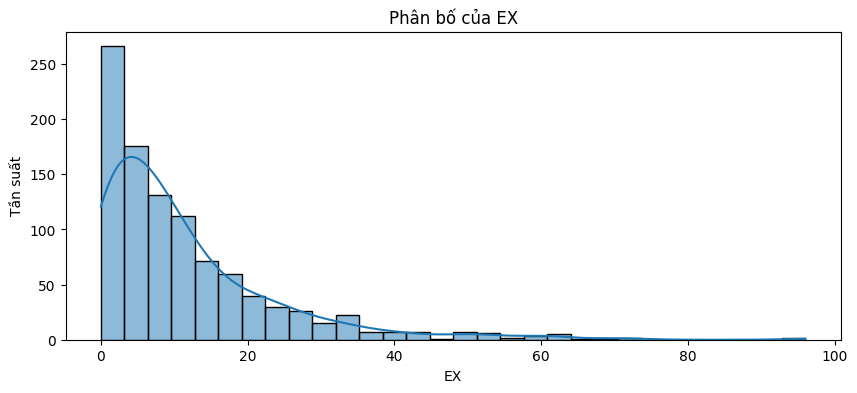

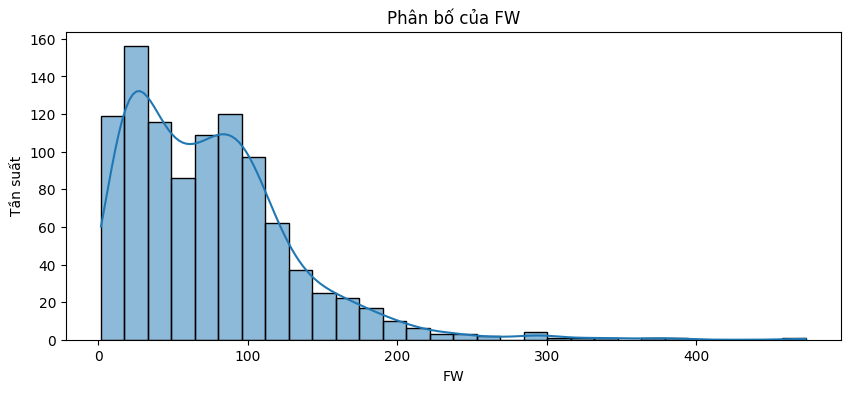

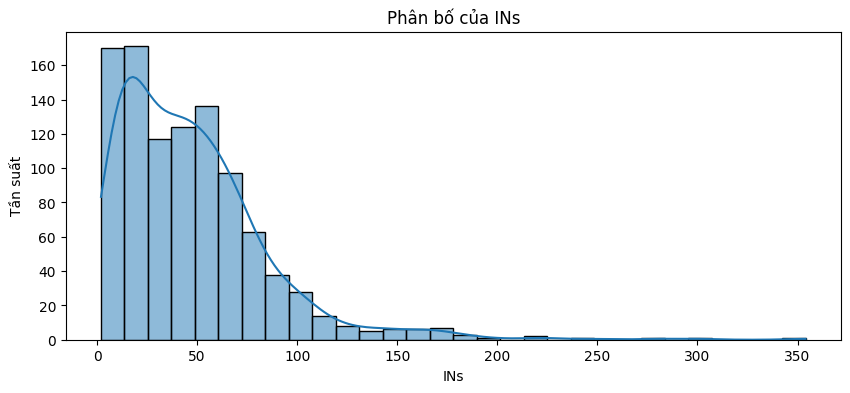

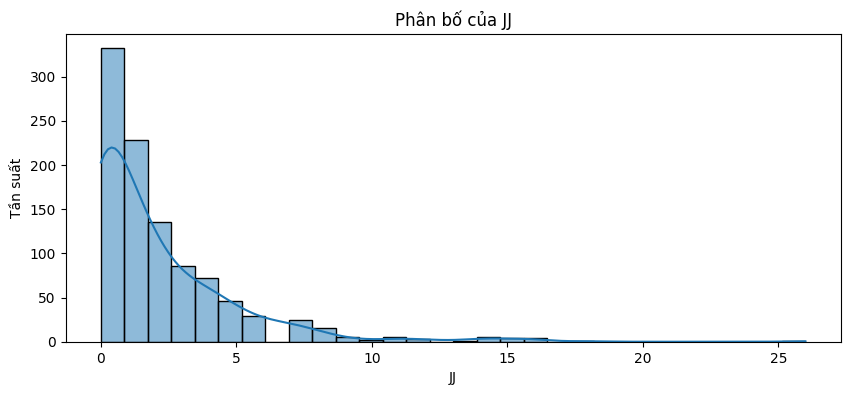

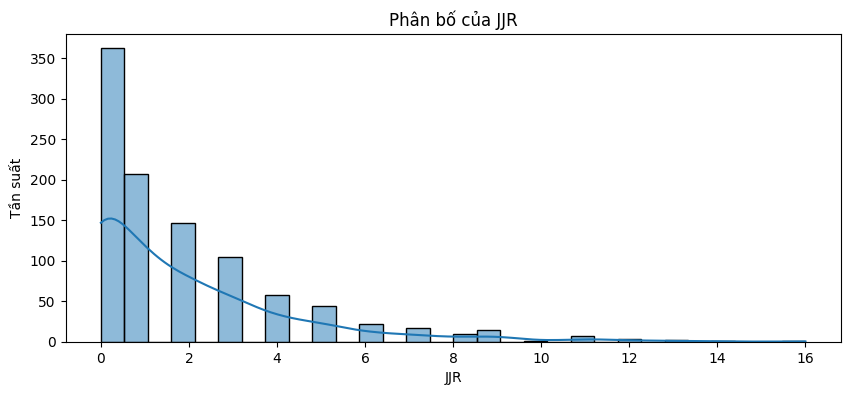

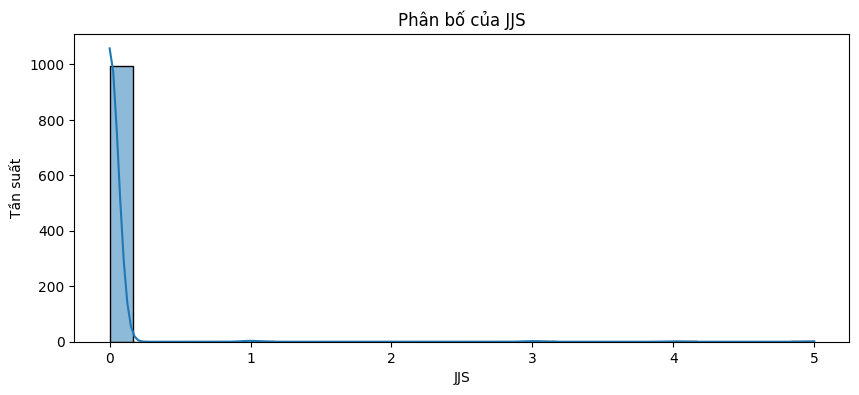

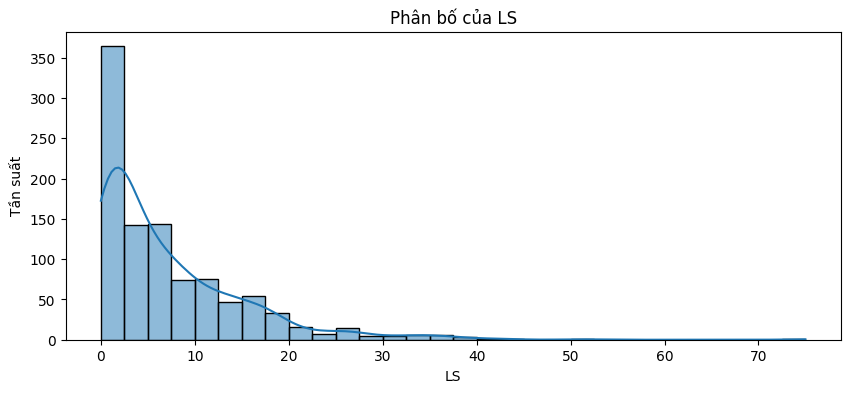

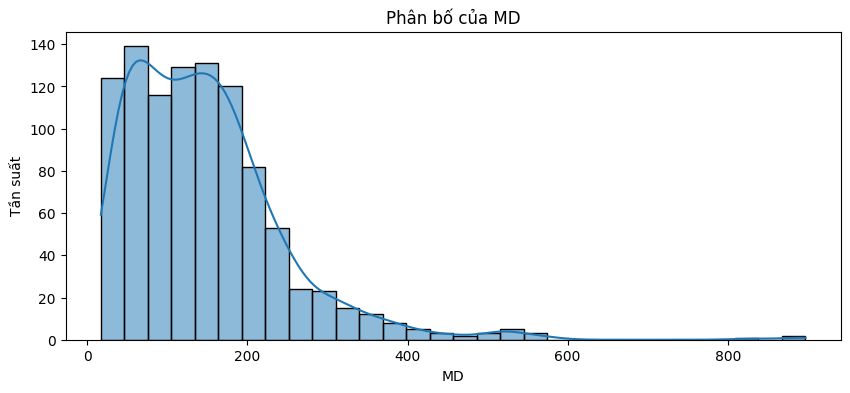

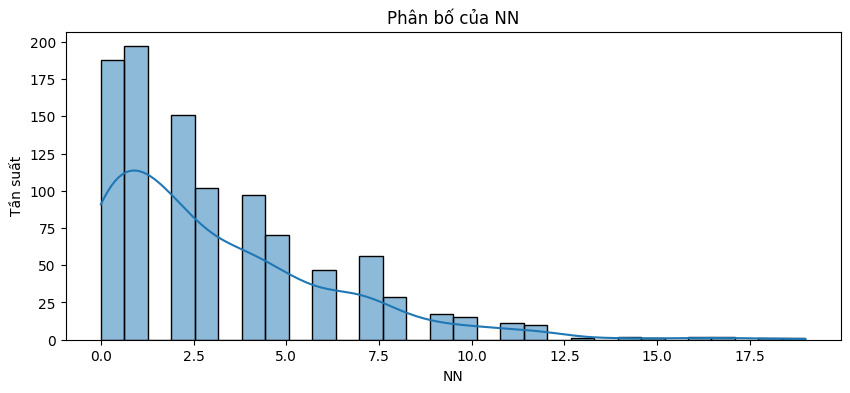

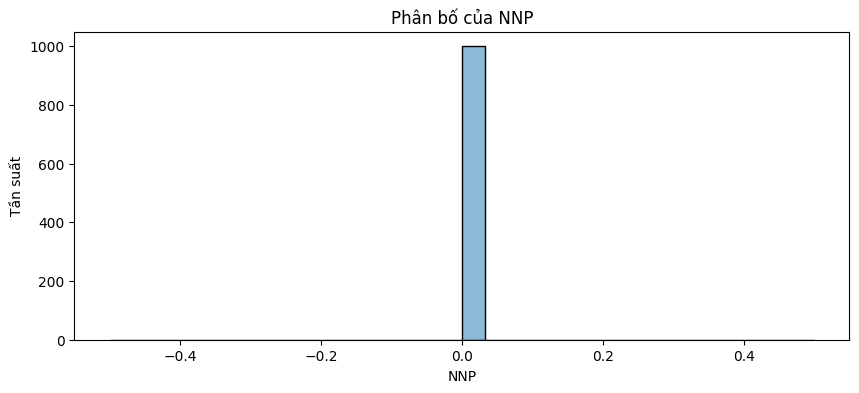

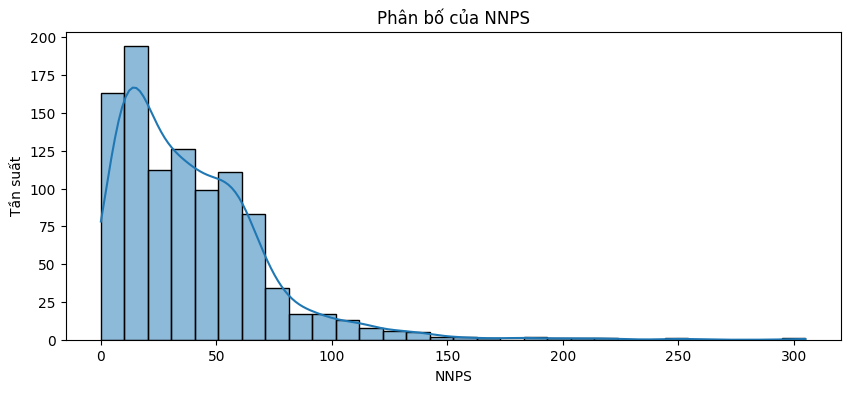

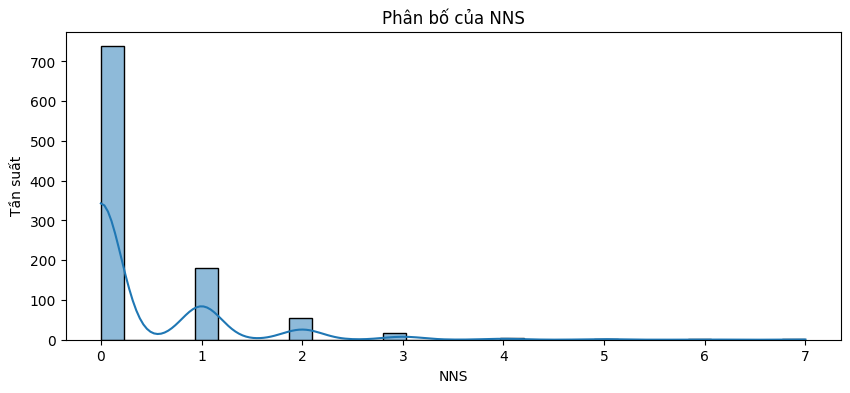

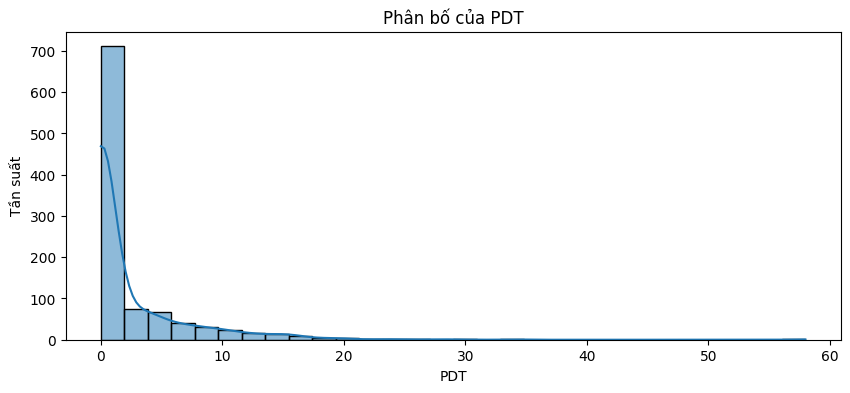

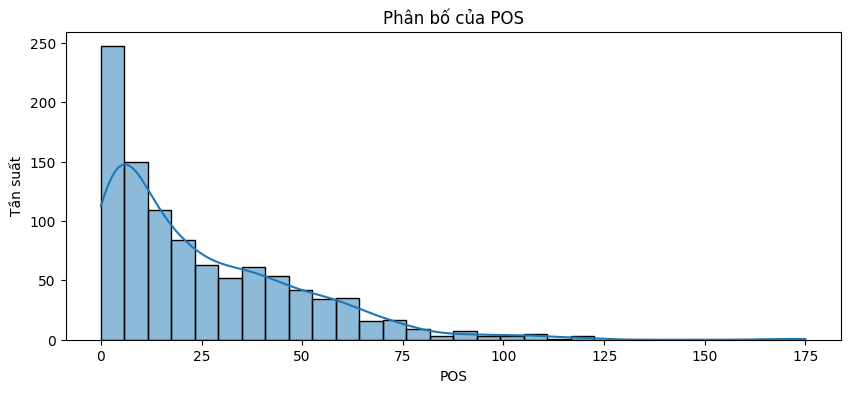

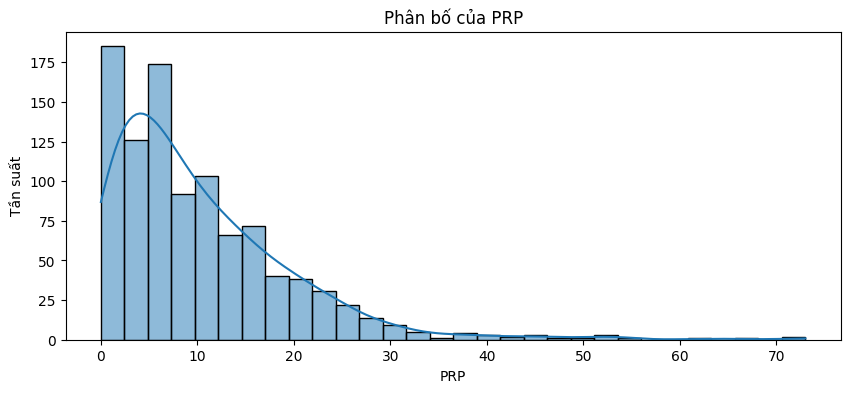

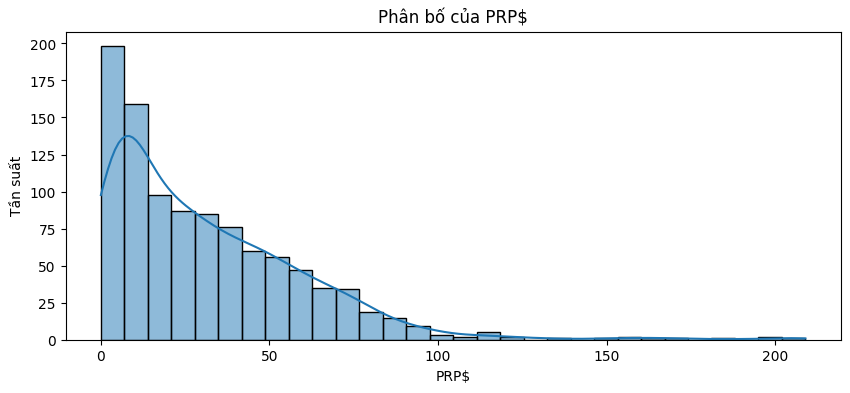

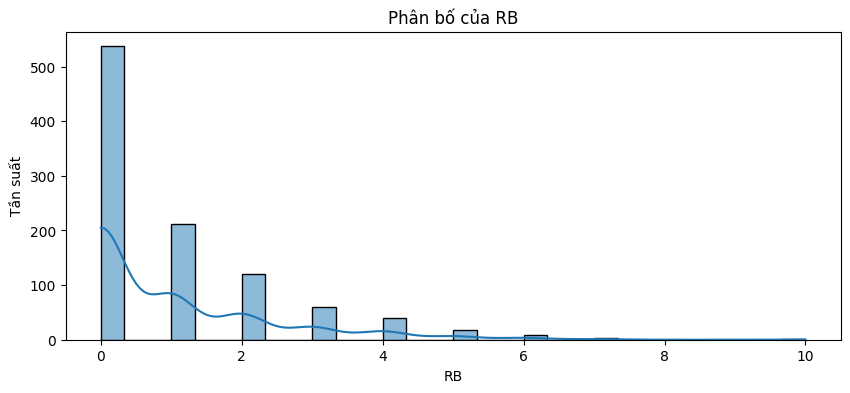

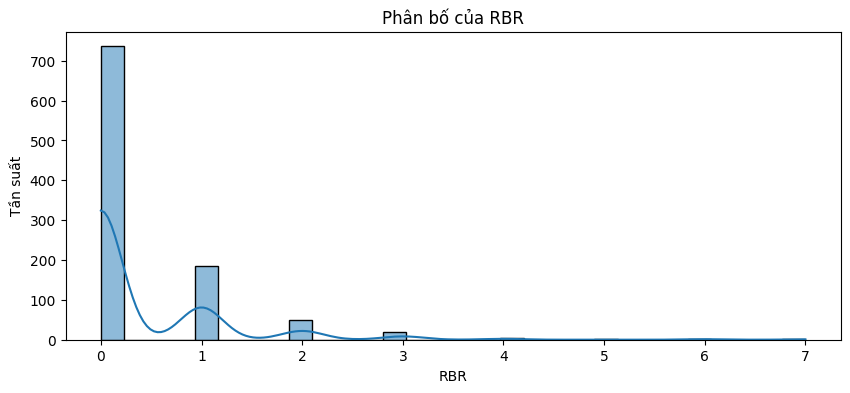

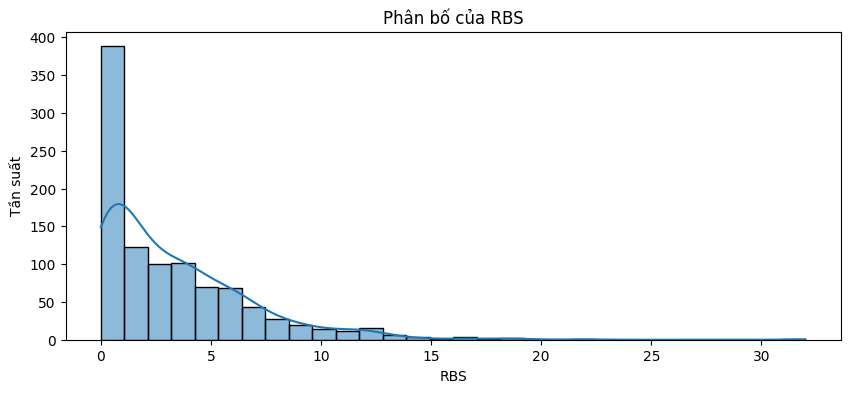

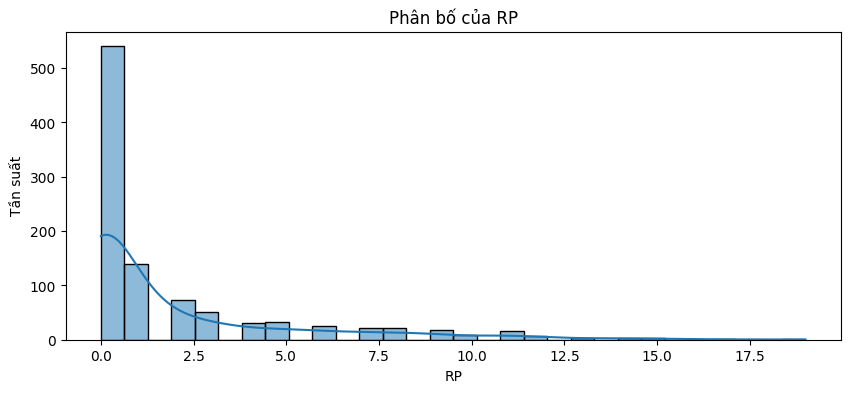

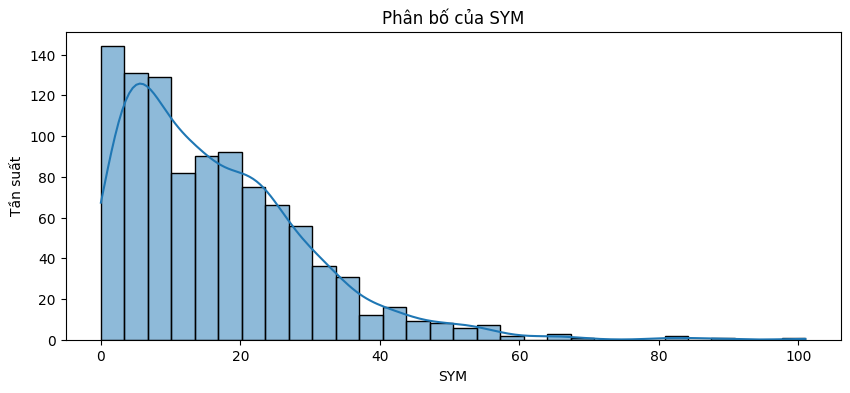

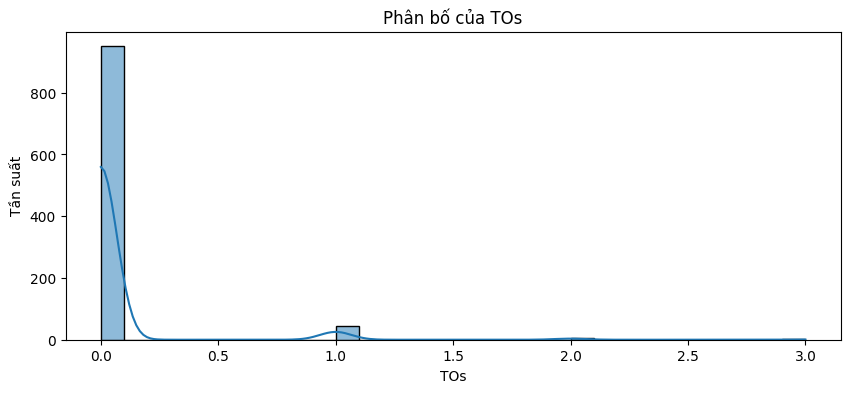

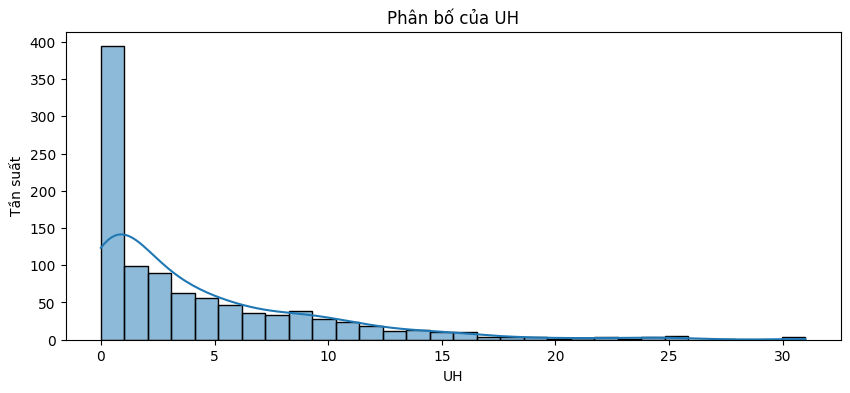

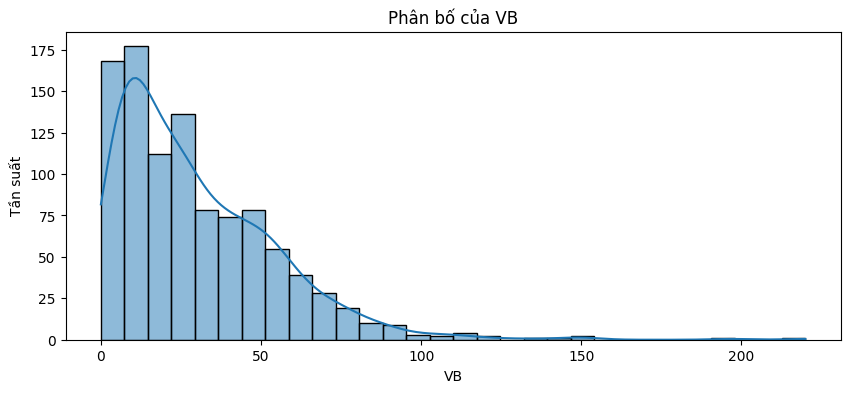

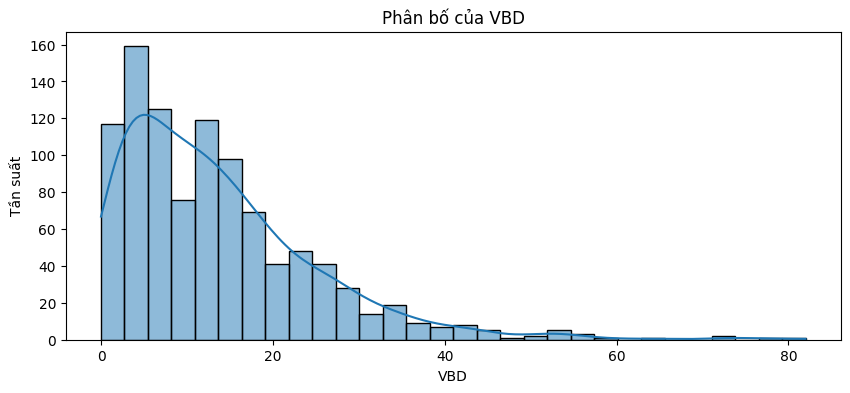

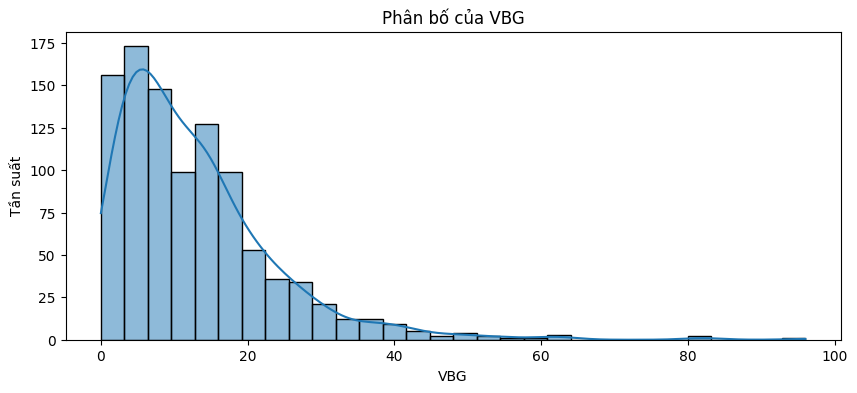

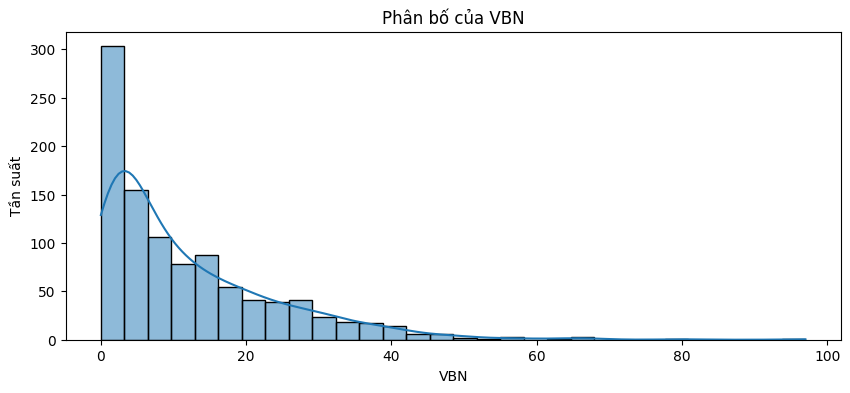

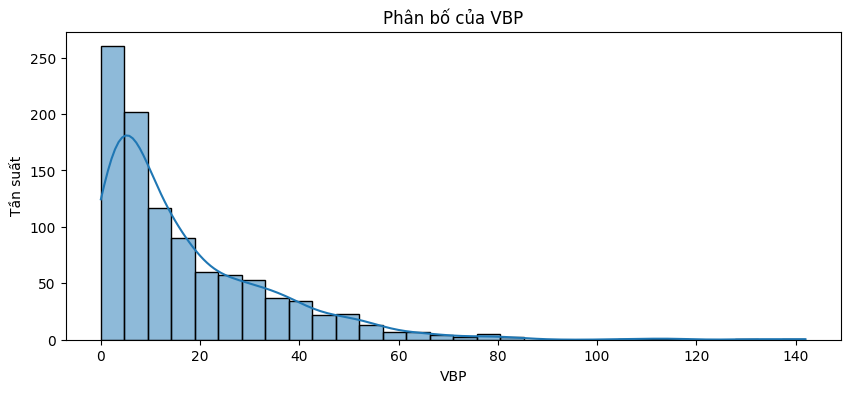

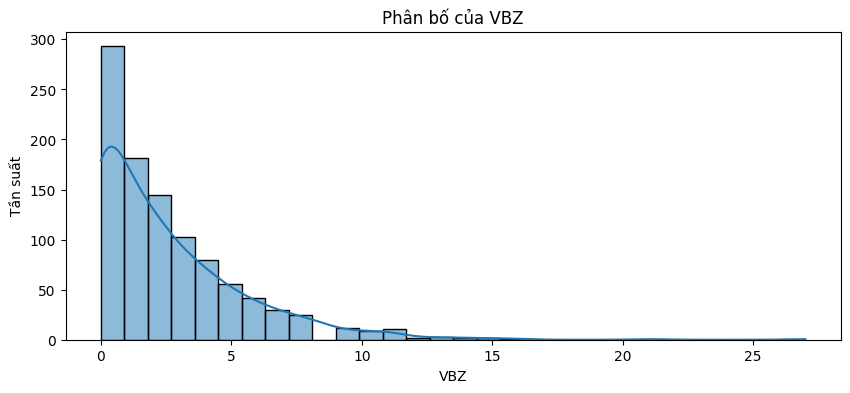

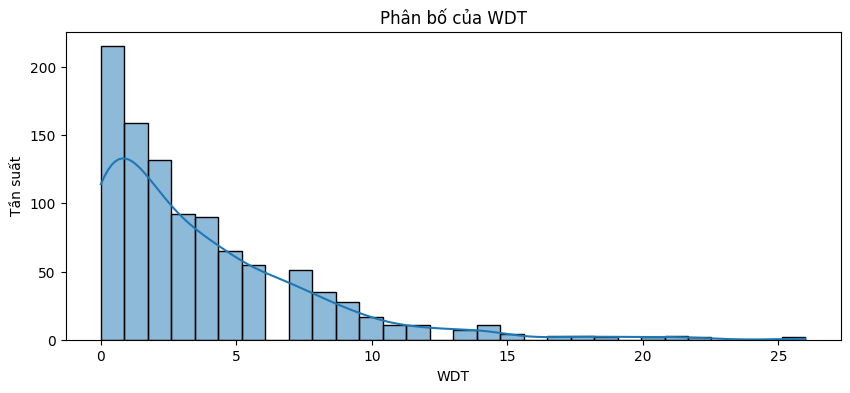

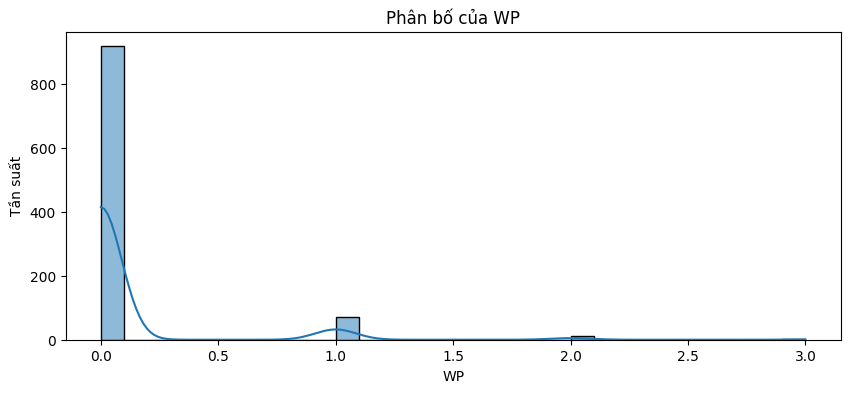

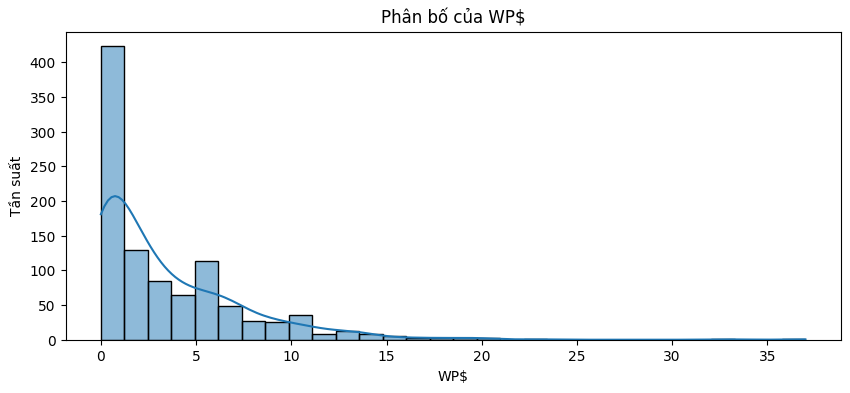

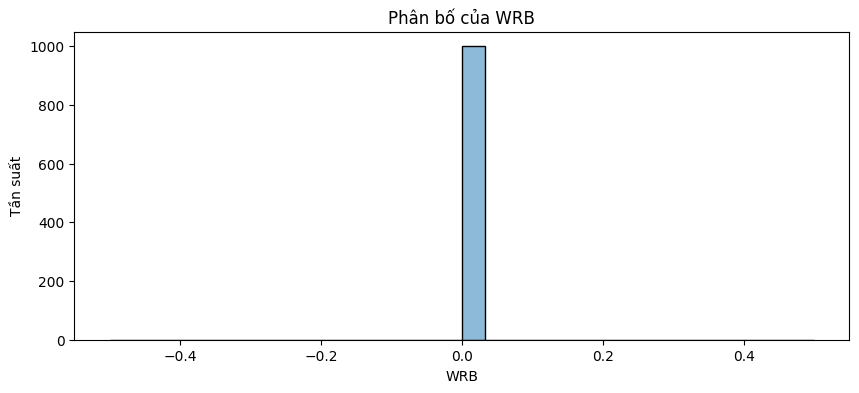

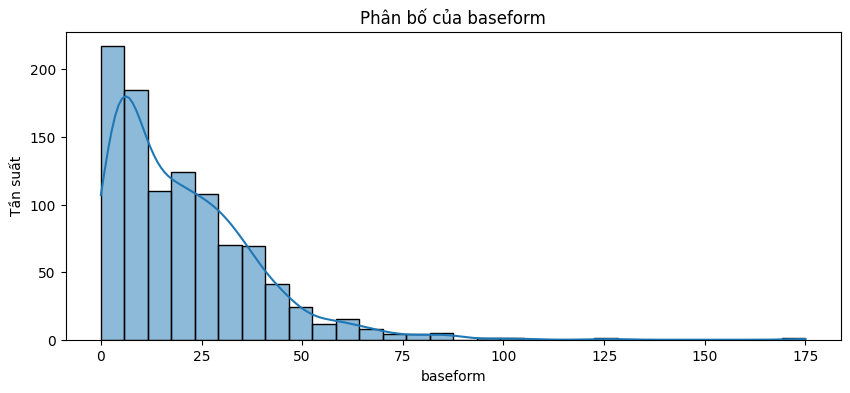

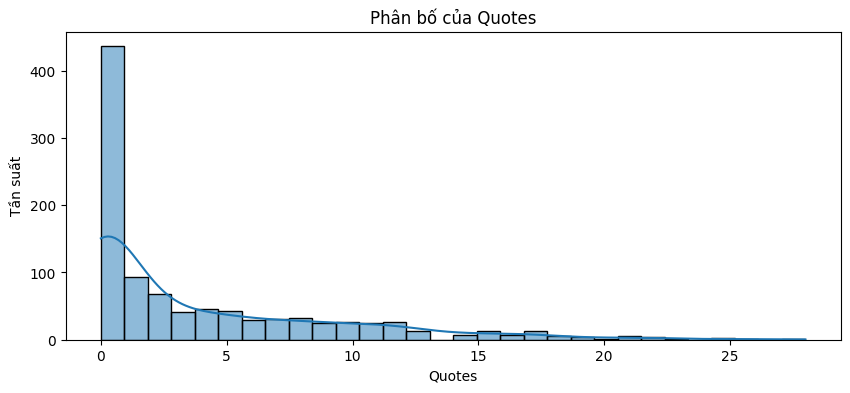

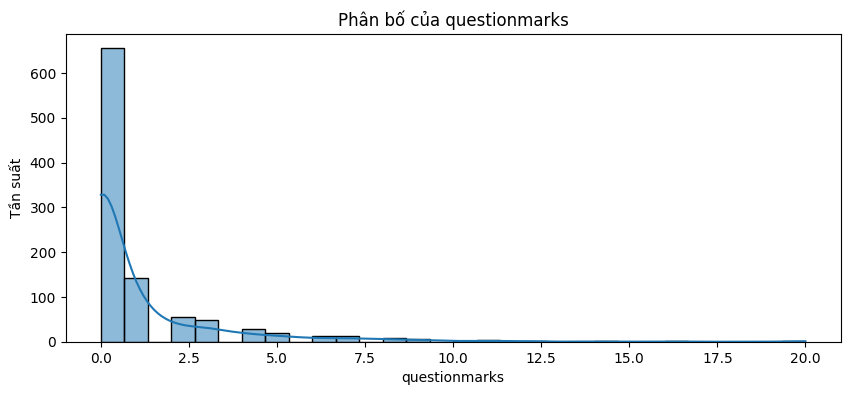

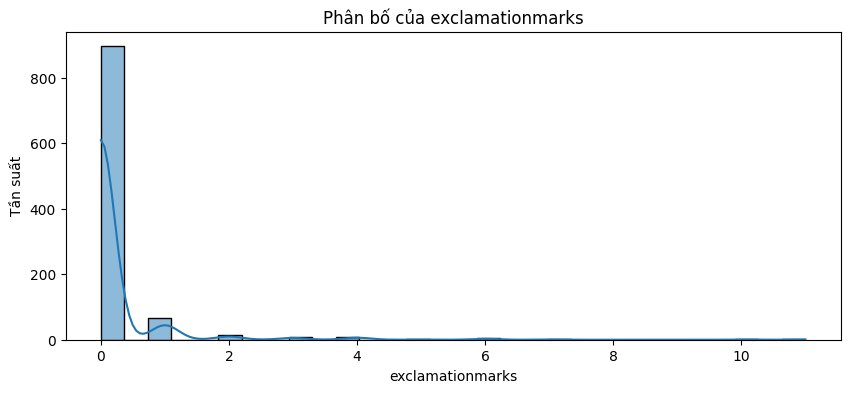

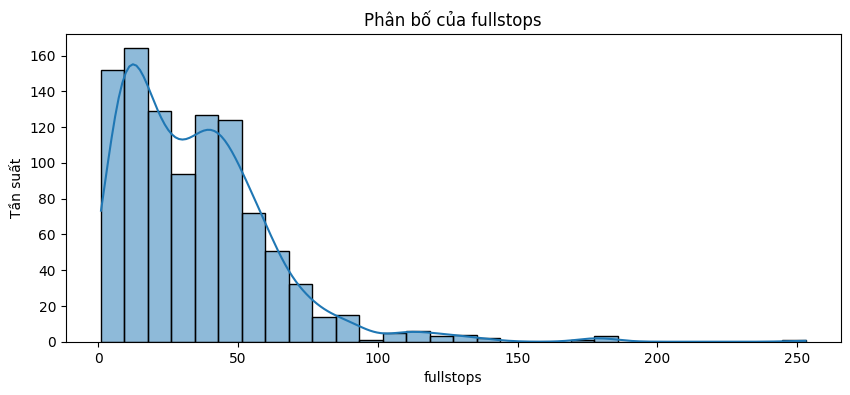

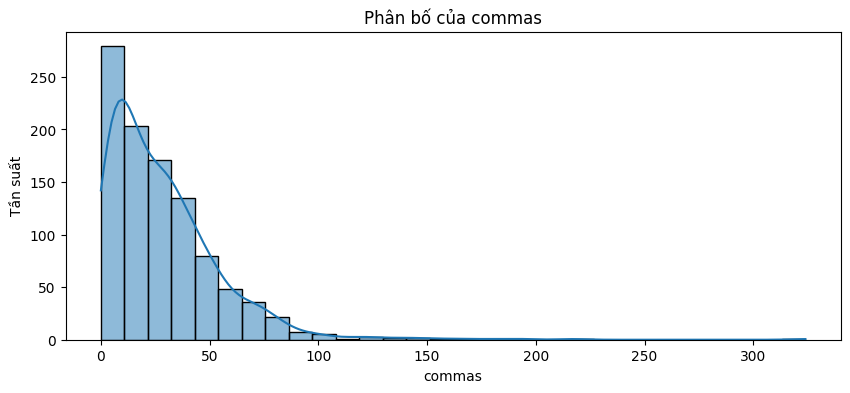

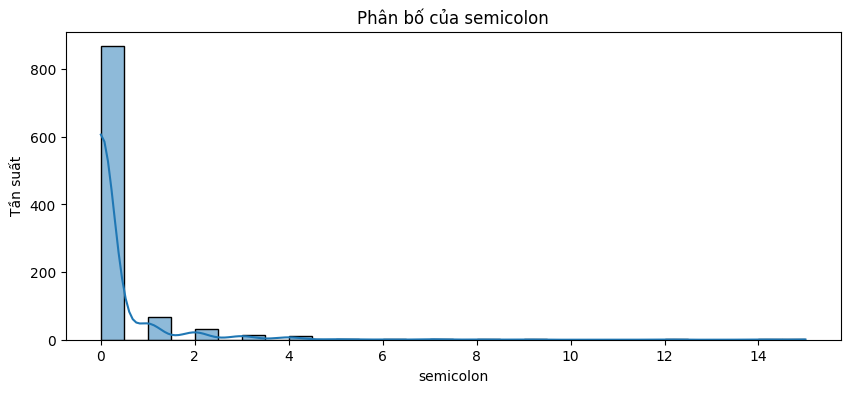

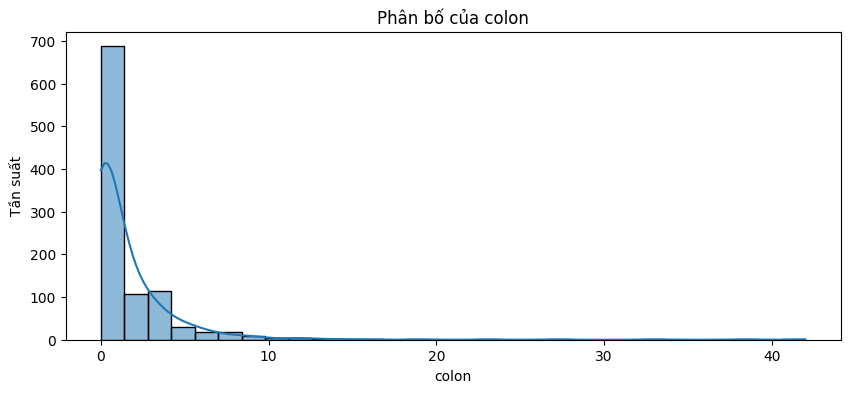

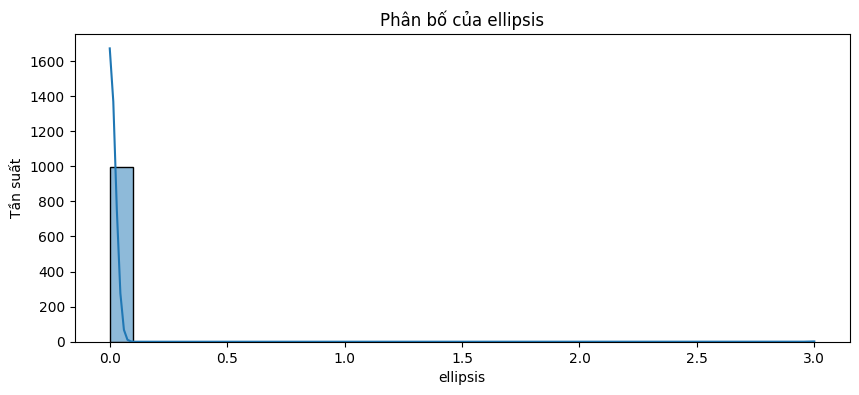

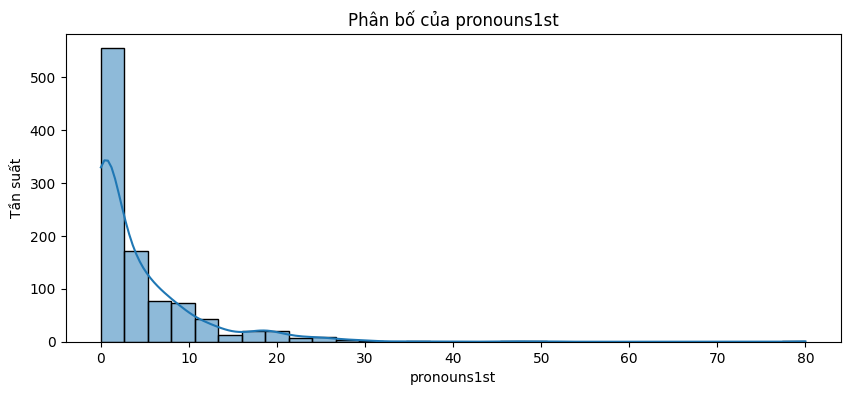

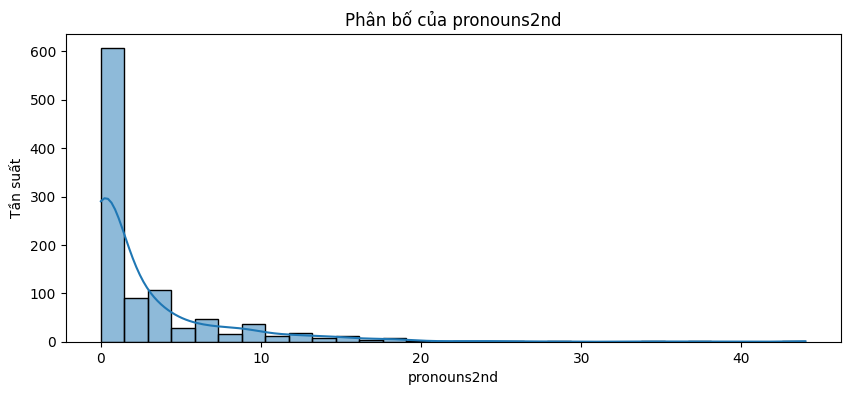

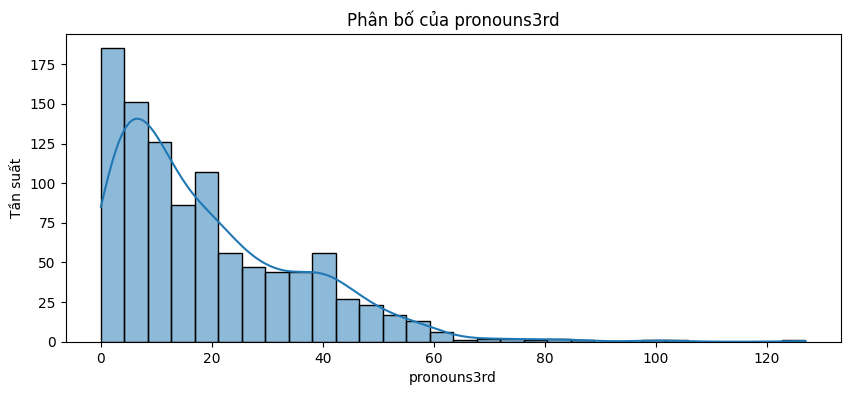

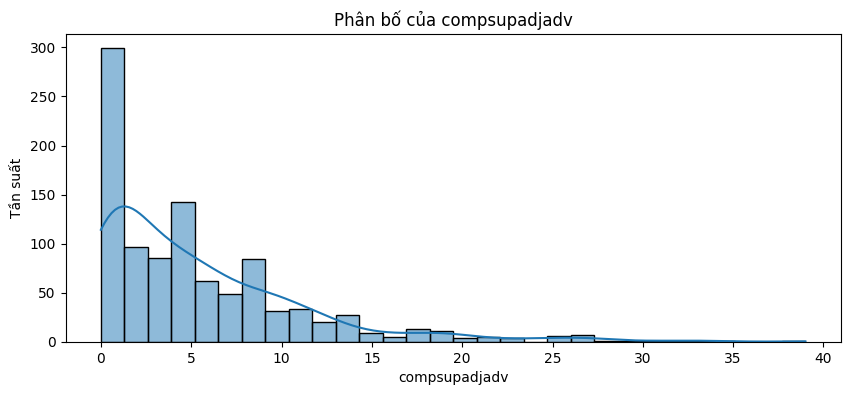

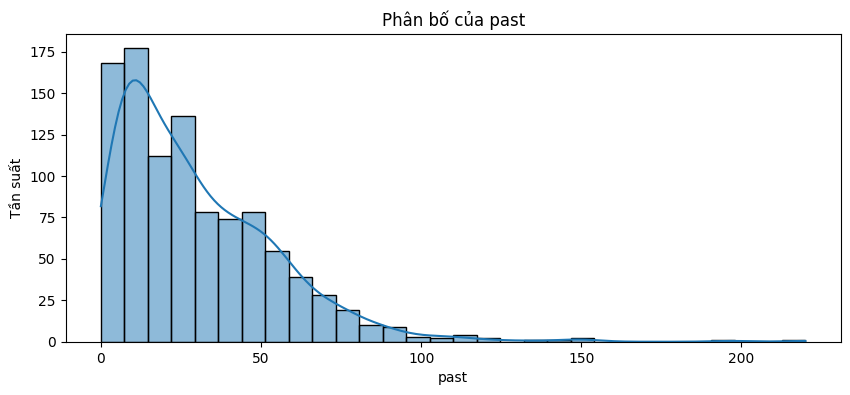

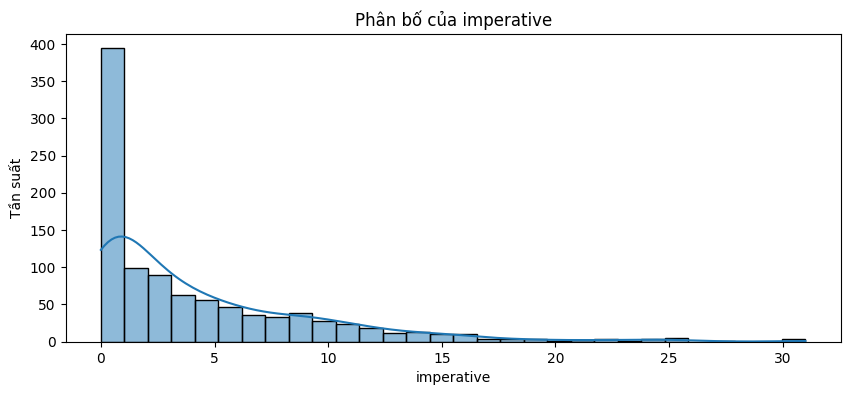

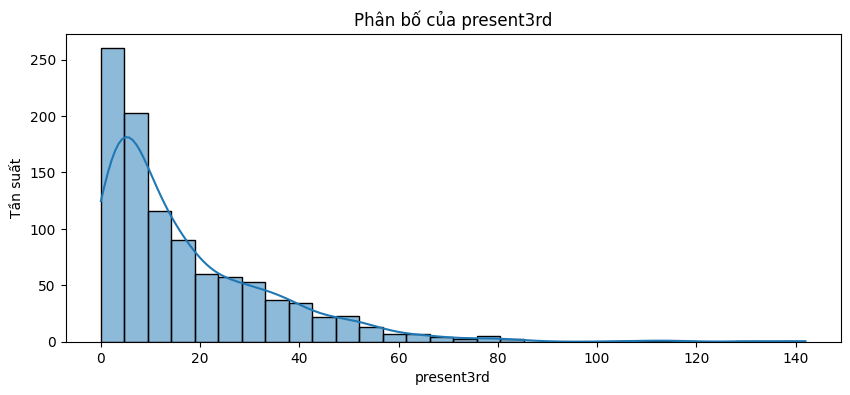

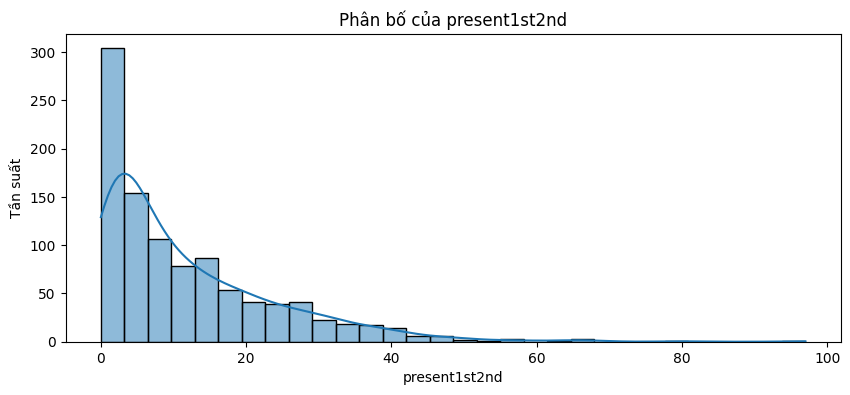

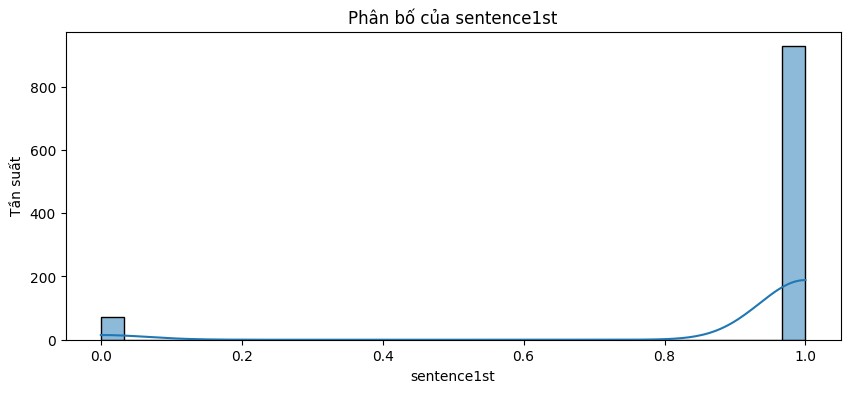

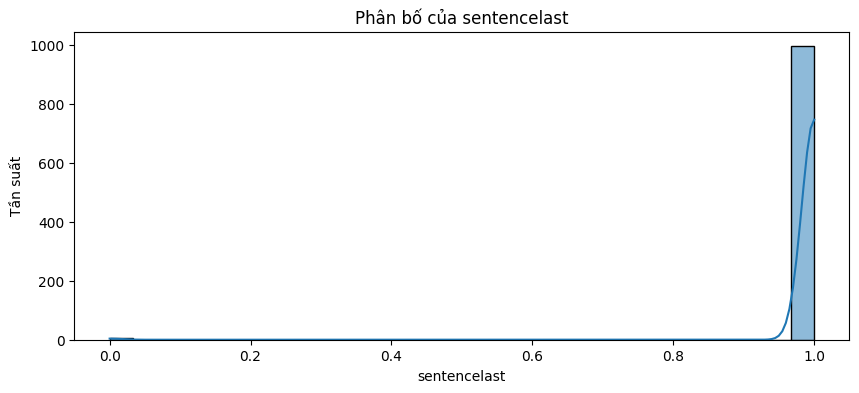

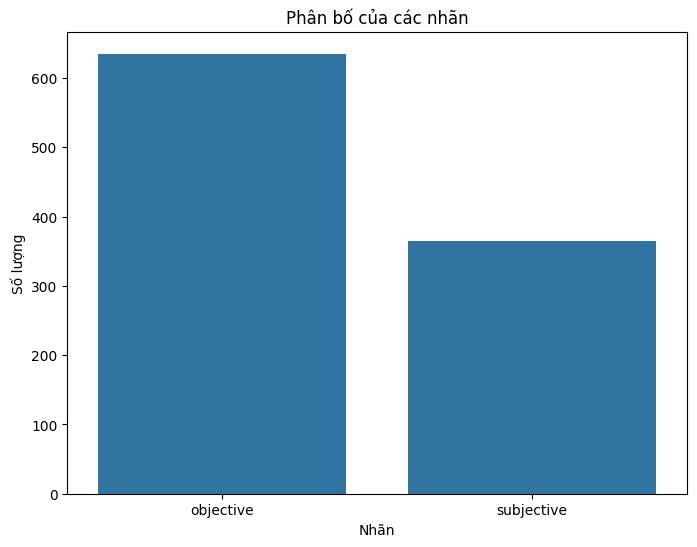

In [ ]:

# Tải dữ liệu từ file CSV
data = pd.read_csv('project.csv')

# Hiển thị thông tin cơ bản và thống kê mô tả của dữ liệu
print(data.info())
print(data.describe())

# Vẽ phân bố của các đặc trưng
features = data.columns[:-1]

for feature in features:
    plt.figure(figsize=(10, 4))
    sns.histplot(data[feature], bins=30, kde=True)
    plt.title(f'Phân bố của {feature}')
    plt.xlabel(feature)
    plt.ylabel('Tần suất')
    plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='Label', data=data)
plt.title('Phân bố của các nhãn')
plt.xlabel('Nhãn')
plt.ylabel('Số lượng')
plt.show()


Xử lý dữ liệu thiếu


In [ ]:
# Kiểm tra kiểu dữ liệu của các cột
print("Kiểu dữ liệu của các cột:")
print(data_cleaned.dtypes)

# Lọc các cột có kiểu dữ liệu số (int, float)
continuous_columns = data_cleaned.select_dtypes(include=['int64', 'float64']).columns
print("Các cột liên tục trong dữ liệu:")
print(continuous_columns)


Kiểu dữ liệu của các cột:
TextID               int64
URL                  int64
Label               object
totalWordsCount      int64
semanticobjscore     int64
                     ...  
present3rd           int64
present1st2nd        int64
sentence1st          int64
sentencelast         int64
txtcomplexity        int64
Length: 62, dtype: object
Các cột liên tục trong dữ liệu:
Index(['TextID', 'URL', 'totalWordsCount', 'semanticobjscore',
       'semanticsubjscore', 'CC', 'CD', 'DT', 'EX', 'FW', 'INs', 'JJ', 'JJR',
       'JJS', 'LS', 'MD', 'NN', 'NNP', 'NNPS', 'NNS', 'PDT', 'POS', 'PRP',
       'PRP$', 'RB', 'RBR', 'RBS', 'RP', 'SYM', 'TOs', 'UH', 'VB', 'VBD',
       'VBG', 'VBN', 'VBP', 'VBZ', 'WDT', 'WP', 'WP$', 'WRB', 'baseform',
       'Quotes', 'questionmarks', 'exclamationmarks', 'fullstops', 'commas',
       'semicolon', 'colon', 'ellipsis', 'pronouns1st', 'pronouns2nd',
       'pronouns3rd', 'compsupadjadv', 'past', 'imperative', 'present3rd',
       'present1st2nd', 'sentenc

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, KBinsDiscretizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Đọc dữ liệu vào DataFrame
data = pd.read_csv('project.csv')

# 1. Xử Lý Dữ Liệu Thiếu
# a. Kiểm Tra Giá Trị Thiếu
missing_data = data.isnull().sum()
print("Giá trị thiếu theo từng cột:")
print(missing_data[missing_data > 0])

# b. Xử Lý Giá Trị Thiếu
# Loại bỏ hàng có giá trị thiếu
data_cleaned = data.dropna()
print("Số lượng dữ liệu sau khi loại bỏ hàng thiếu:", data_cleaned.shape[0])

# Thay thế giá trị thiếu bằng giá trị trung bình cho các cột số
data_cleaned.fillna(data_cleaned.mean(numeric_only=True), inplace=True)

# Thay thế giá trị thiếu bằng giá trị xuất hiện nhiều nhất cho các cột phân loại
mode_values = data_cleaned.mode().iloc[0]
data_cleaned.fillna(mode_values, inplace=True)

# 2. Chuyển Đổi Dữ Liệu Chuỗi Thành Dữ Liệu Số
# Chọn các cột chuỗi
text_columns = ['TextID', 'URL']

# Sử dụng Label Encoding cho các cột chuỗi
label_encoders = {}
for col in text_columns:
    le = LabelEncoder()
    data_cleaned[col] = le.fit_transform(data_cleaned[col])
    label_encoders[col] = le

# Chia dữ liệu thành các tính năng (X) và nhãn (y)
X = data_cleaned.drop(['Label'], axis=1)
y = data_cleaned['Label']

# 3. Lựa Chọn Tính Năng
# a. Lựa Chọn Tính Năng Dựa Trên Đặc Trưng
# Sử dụng SelectKBest để chọn 10 tính năng tốt nhất
selector = SelectKBest(score_func=chi2, k=10)
X_new = selector.fit_transform(X, y)
print("Tính năng được chọn:", X.columns[selector.get_support()])

# b. Lựa Chọn Tính Năng Dựa Trên Ma Trận Hệ Số
# Sử dụng mô hình RandomForest để đánh giá độ quan trọng của tính năng
model = RandomForestClassifier()
model.fit(X, y)
importances = model.feature_importances_

# Sắp xếp các tính năng theo độ quan trọng
indices = importances.argsort()[::-1]
print("Tính năng được sắp xếp theo độ quan trọng:")
for idx in indices:
    print(X.columns[idx], importances[idx])

# c. Lựa Chọn Tính Năng Dựa Trên PCA
# Giảm số lượng thành phần xuống còn 5
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)
print("Giải thích biến động của PCA:", pca.explained_variance_ratio_)

# 4. Phân Rã Dữ Liệu (Discretization)
# Chọn cột 'totalWordsCount' để phân rã
if 'totalWordsCount' in data_cleaned.columns:
    data_cleaned['binned_totalWordsCount'] = pd.cut(data_cleaned['totalWordsCount'], bins=5)
    print("Dữ liệu sau khi phân rã cho cột 'totalWordsCount':")
    print(data_cleaned[['totalWordsCount', 'binned_totalWordsCount']].head())

    # Sử Dụng KBinsDiscretizer cho cột 'totalWordsCount'
    discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
    X_discretized = discretizer.fit_transform(data_cleaned[['totalWordsCount']])
    print("Dữ liệu phân rã bằng KBinsDiscretizer cho cột 'totalWordsCount':")
    print(X_discretized[:5])
else:
    print("Cột 'totalWordsCount' không tồn tại trong dữ liệu.")

# Chọn cột 'semanticobjscore' để phân rã
if 'semanticobjscore' in data_cleaned.columns:
    data_cleaned['binned_semanticobjscore'] = pd.cut(data_cleaned['semanticobjscore'], bins=5)
    print("Dữ liệu sau khi phân rã cho cột 'semanticobjscore':")
    print(data_cleaned[['semanticobjscore', 'binned_semanticobjscore']].head())

    # Sử Dụng KBinsDiscretizer cho cột 'semanticobjscore'
    discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
    X_discretized = discretizer.fit_transform(data_cleaned[['semanticobjscore']])
    print("Dữ liệu phân rã bằng KBinsDiscretizer cho cột 'semanticobjscore':")
    print(X_discretized[:5])
else:
    print("Cột 'semanticobjscore' không tồn tại trong dữ liệu.")

# 5. Xử Lý Dữ Liệu Mất Cân Bằng (Imbalanced Data)
# a. Kỹ Thuật Oversampling với SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)
print("Số lượng dữ liệu sau khi áp dụng SMOTE:", pd.Series(y_resampled).value_counts())

# b. Kỹ Thuật Undersampling với RandomUnderSampler
rus = RandomUnderSampler()
X_resampled, y_resampled = rus.fit_resample(X, y)
print("Số lượng dữ liệu sau khi áp dụng RandomUnderSampler:", pd.Series(y_resampled).value_counts())

# c. Kỹ Thuật Kết Hợp với SMOTEENN
smote_enn = SMOTEENN()
X_resampled, y_resampled = smote_enn.fit_resample(X, y)
print("Số lượng dữ liệu sau khi áp dụng SMOTEENN:", pd.Series(y_resampled).value_counts())

# 6. Chia Dữ Liệu
# Chia dữ liệu thành tập huấn luyện, tập xác thực và tập kiểm tra
X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
print("Kích thước dữ liệu phân chia:")
print("Tập huấn luyện:", X_train.shape, y_train.shape)
print("Tập xác thực:", X_val.shape, y_val.shape)
print("Tập kiểm tra:", X_test.shape, y_test.shape)


Giá trị thiếu theo từng cột:
Series([], dtype: int64)
Số lượng dữ liệu sau khi loại bỏ hàng thiếu: 1000
Tính năng được chọn: Index(['TextID', 'totalWordsCount', 'semanticobjscore', 'CD', 'FW', 'INs',
       'MD', 'POS', 'PRP$', 'VBP'],
      dtype='object')
Tính năng được sắp xếp theo độ quan trọng:
TextID 0.34025749812244754
LS 0.05365629589385919
VBP 0.040150674921788136
present3rd 0.035354241968260085
PRP$ 0.03465514403379072
semanticsubjscore 0.03240458192371899
CD 0.028418785423818246
POS 0.024678719955867557
present1st2nd 0.021335180171955397
imperative 0.018643773965492157
questionmarks 0.018082936163890454
UH 0.017833039883626983
semanticobjscore 0.017805201756155697
VBN 0.01630340933132722
compsupadjadv 0.014583593598211552
pronouns2nd 0.014431107475560393
URL 0.013960659938045803
Quotes 0.01375889935621823
baseform 0.012503351568851517
CC 0.012384767116581043
past 0.012285243561874031
totalWordsCount 0.011645263164905937
RP 0.011416081032616947
VB 0.009708593708282882
DT 0.00

Neural Network

                             precision    recall  f1-score
Neural Network - Objective    0.933333  0.924528  0.928910
Neural Network - Subjective   0.929825  0.938053  0.933921


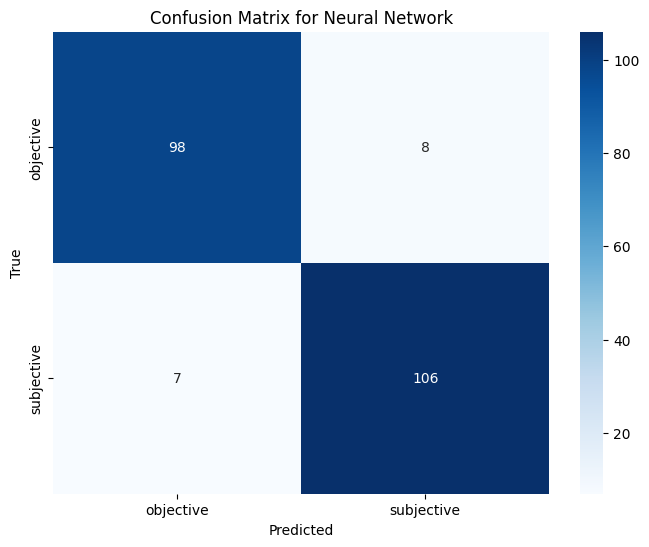

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Khởi tạo mô hình Neural Network
nn_clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
# Huấn luyện mô hình
nn_clf.fit(X_train, y_train)
# Dự đoán trên tập kiểm tra
y_pred_nn = nn_clf.predict(X_test)
# Lưu kết quả
nn_report = classification_report(y_test, y_pred_nn, output_dict=True)
# Hiển thị bảng kết quả
def display_results(results):
    metrics = ['precision', 'recall', 'f1-score']
    metrics_results = {metric: [] for metric in metrics}
    models = ['Neural Network']
    for metric in metrics:
        metrics_results[metric].append(results['objective'][metric])
        metrics_results[metric].append(results['subjective'][metric])
    # Tạo bảng kết quả
    metrics_results_df = pd.DataFrame(metrics_results, index=[f"Neural Network - Objective", "Neural Network - Subjective"])
    print(metrics_results_df)
display_results(nn_report)
# Hiển thị ma trận nhầm lẫn
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred, labels=['objective', 'subjective'])
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['objective', 'subjective'], yticklabels=['objective', 'subjective'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()
plot_confusion_matrix(y_test, y_pred_nn, title='Confusion Matrix for Neural Network')


SVM

                             precision    recall  f1-score
Neural Network - Objective    0.981308  0.990566  0.985915
Neural Network - Subjective   0.991071  0.982301  0.986667


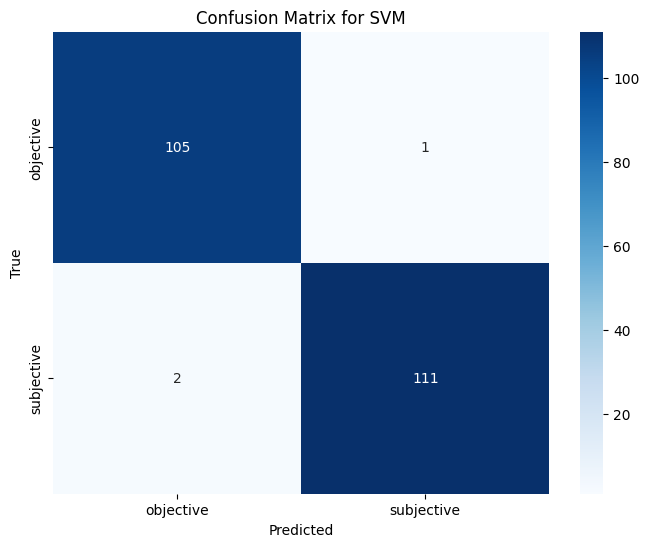

In [ ]:
from sklearn.svm import SVC

# Khởi tạo mô hình SVM
svm_clf = SVC(kernel='linear', random_state=42)

# Huấn luyện mô hình
svm_clf.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred_svm = svm_clf.predict(X_test)

# Lưu kết quả
svm_report = classification_report(y_test, y_pred_svm, output_dict=True)

# Hiển thị bảng kết quả
display_results(svm_report)

# Hiển thị ma trận nhầm lẫn
plot_confusion_matrix(y_test, y_pred_svm, title='Confusion Matrix for SVM')


Random Forest

                             precision    recall  f1-score
Neural Network - Objective    0.981308  0.990566  0.985915
Neural Network - Subjective   0.991071  0.982301  0.986667


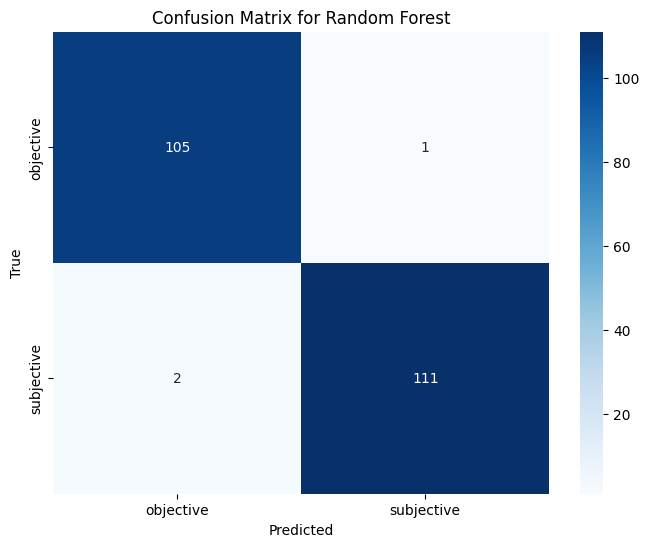

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Khởi tạo mô hình Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Huấn luyện mô hình
rf_clf.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred_rf = rf_clf.predict(X_test)

# Lưu kết quả
rf_report = classification_report(y_test, y_pred_rf, output_dict=True)

# Hiển thị bảng kết quả
display_results(rf_report)

# Hiển thị ma trận nhầm lẫn
plot_confusion_matrix(y_test, y_pred_rf, title='Confusion Matrix for Random Forest')


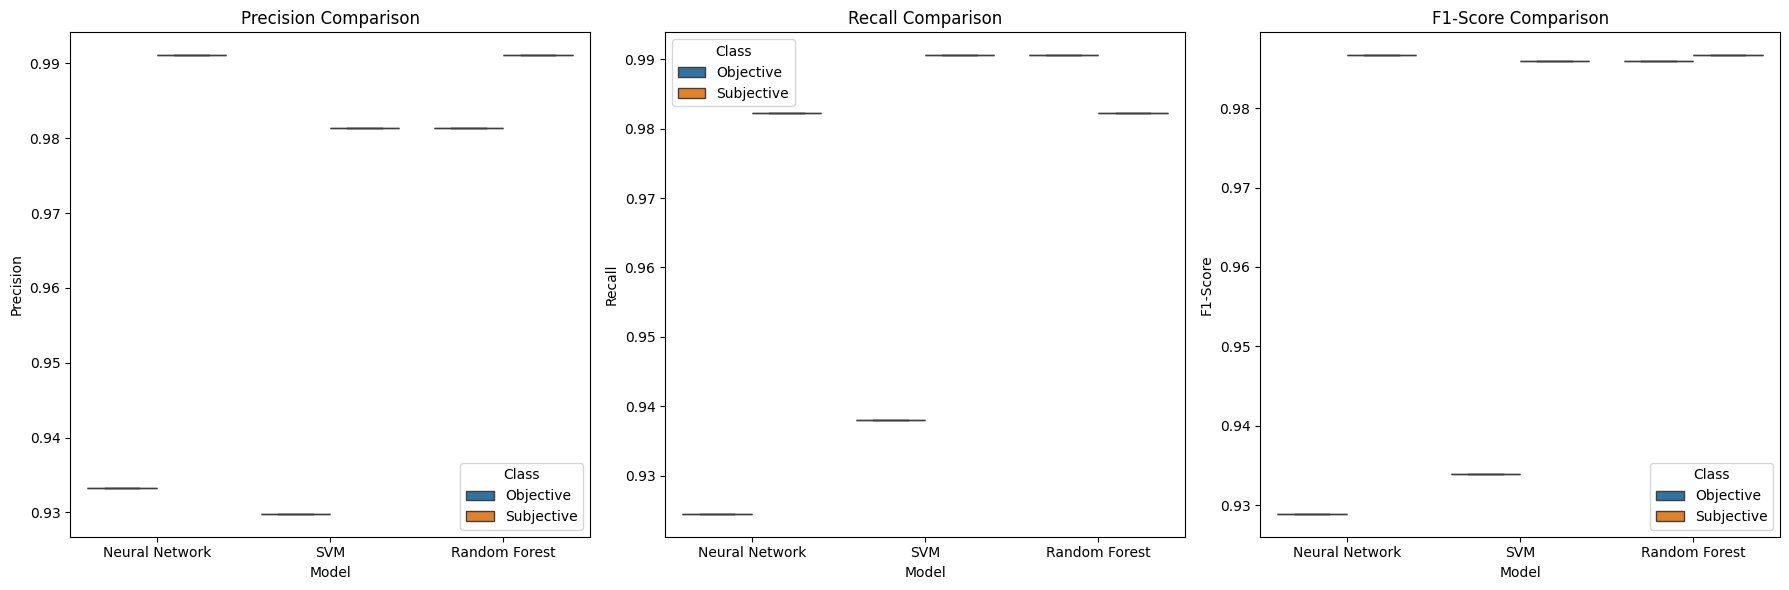

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dữ liệu kết quả cho các mô hình
data = {
    'Model': ['Neural Network', 'SVM', 'Random Forest'] * 2,
    'Class': ['Objective', 'Objective', 'Objective', 'Subjective', 'Subjective', 'Subjective'],
    'Precision': [0.933333, 0.929825, 0.981308, 0.991071, 0.981308, 0.991071],
    'Recall': [0.924528, 0.938053, 0.990566, 0.982301, 0.990566, 0.982301],
    'F1-Score': [0.928910, 0.933921, 0.985915, 0.986667, 0.985915, 0.986667]
}

df = pd.DataFrame(data)

# Vẽ biểu đồ hộp cho các chỉ số đánh giá
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(x='Model', y='Precision', hue='Class', data=df, ax=axs[0])
axs[0].set_title('Precision Comparison')

sns.boxplot(x='Model', y='Recall', hue='Class', data=df, ax=axs[1])
axs[1].set_title('Recall Comparison')

sns.boxplot(x='Model', y='F1-Score', hue='Class', data=df, ax=axs[2])
axs[2].set_title('F1-Score Comparison')

plt.tight_layout()
plt.show()
